In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('empreinteCarboneMissions_2022121.tsv', sep='\t')
data = data.rename(columns={'Quantité' : 'N', 'Distance (km)': 'dist'})

In [2]:
subdata = data.loc[:, ['N', 'dist']]
subdata = subdata.loc[subdata['dist'] > 0, :]
subdata = subdata.sort_values(by='N', ascending=False)
subdata['dist'] = subdata['dist'].divide(subdata['N'] * 2)
dist = subdata['dist'].values.copy()
N = subdata['N'].values.copy()
subdata

,N,dist
11,269,689.596654
5,86,35.715116
25,71,30.957746
33,61,713.516393
52,42,99.773810
...,...,...
295,1,578.000000
294,1,8137.000000
293,1,411.000000
292,1,1565.500000


In [3]:
dmin = float(dist.min())
dmin

4.5

In [4]:
dmax = float(dist.max())
dmax

17246.0

In [5]:
dmax = 18000
dmax

18000

In [6]:
step = 250
bins = np.arange(0, dmax + step, step)
nbins = len(bins)
bins

array([    0,   250,   500,   750,  1000,  1250,  1500,  1750,  2000,
        2250,  2500,  2750,  3000,  3250,  3500,  3750,  4000,  4250,
        4500,  4750,  5000,  5250,  5500,  5750,  6000,  6250,  6500,
        6750,  7000,  7250,  7500,  7750,  8000,  8250,  8500,  8750,
        9000,  9250,  9500,  9750, 10000, 10250, 10500, 10750, 11000,
       11250, 11500, 11750, 12000, 12250, 12500, 12750, 13000, 13250,
       13500, 13750, 14000, 14250, 14500, 14750, 15000, 15250, 15500,
       15750, 16000, 16250, 16500, 16750, 17000, 17250, 17500, 17750,
       18000])

In [7]:
dl = np.diff(bins)[0]

In [8]:
index = np.digitize(dist, bins, right=True)

In [9]:
outputs = np.zeros((len(bins) - 1), dtype=float)
for i in np.unique(index):
    iok = np.nonzero(index == i)[0]
    outputs[i - 1] = N[iok].sum()

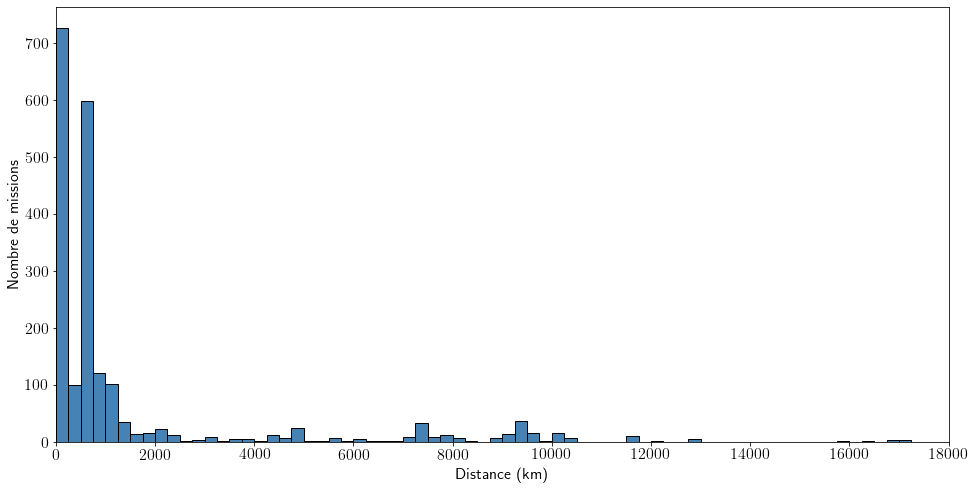

In [10]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8), facecolor='white')
plt.bar(bins[slice(0, nbins - 1)], outputs, width=dl, align='edge', color='steelblue', edgecolor='k')
plt.xlabel('Distance (km)')
plt.ylabel('Nombre de missions')
plt.xlim(0, dmax)
plt.savefig('number_missions.png', bbox_inches='tight')